# Ejercicio 21

## Linear support vector classifier

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

Sin utilizar funciones de sklearn, utilice el data set OJ para encontrar la recta en el espacio de parametros LoyalCH-PriceDiff que mejor logra dividir Purchase en dos clases.

In [21]:
data = pd.read_csv('OJ.csv')
X = data[['LoyalCH', 'PriceDiff']].values
X = normalize(X, axis = 0)
y = data['Purchase']
le = LabelEncoder()
y = le.fit_transform(y) #Variable categórica codificada en ceros y unos.

#Se separan los predictores de acuerdo a la variable categórica.
X1_1 = X[:,0][y == 1]
X1_0 = X[:,0][y == 0]
X2_1 = X[:,1][y == 1]
X2_0 = X[:,1][y == 0]

def line(m, b):
    return (m*X[:,0] + b)

Text(0, 0.5, 'PriceDiff')

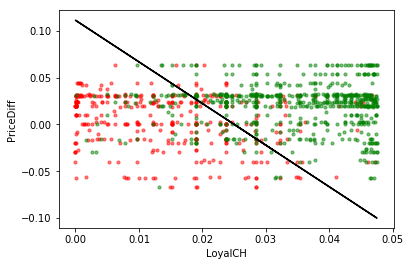

In [27]:
#Después de ver los datos graficados, se escoge a ojo variar el intercepto entre 0 y 1
#y la pendiente entre -10 y 0 pues aproximadamente en ese rango se debe encontrar la recta.
#Pensé mucho en una manera más general de implementarlo, incluso hablé con un profesor
#de matemáticas, pero este es un problema de optimización convexa que en general no
#son fáciles de resolver. El solo hecho de ver si soluciones existen, en este caso hiperplanos
#que separen relativamente bien los datos, es un problema matemático serio. En verdad
#no sé como jaime pretendía que lo implementaramos.

intercept = np.linspace(0, 1, 10)
slope = np.linspace(-10, 0, 10)
param = []

for i in slope:
    for j in intercept:
        u = 0
        d = 0
        for k in range(0,len(line(i,j))):
            if(X[:,1][k] <= line(i,j)[k] and y[k] == 1):
                d += 1
            if(X[:,1][k] > line(i,j)[k] and y[k] == 0):
                u += 1
            up = u/len(X2_1) #Porcentaje de los datos con y=1 que quedaron en el lado correcto
            down = d/len(X2_0) #Porcentaje de los datos con y=0 que quedaron en el lado correcto
        param.append([i, j, up*down])

param = np.array(param)

#Se escoje el par (intercepto, pendiente) que maximice el producto de los porcentajes
#de acierto.
indices = np.where(param == max(param[:,2]))
m = param[indices[0][0]][0]
b = param[indices[0][0]][1]

plt.figure()
plt.plot(X[:,0], line(m,b), color="black", )
plt.scatter(X1_1, X2_1, color="red", alpha = 0.5, s = 10)
plt.scatter(X1_0, X2_0, color="green", alpha = 0.5, s = 10)
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')

Resuelva el mismo problema anterior pero utilizando Linear Support Vector Classifier de sklearn http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC para encontrar la mejor rectar de separación.

Text(0, 0.5, 'PriceDiff')

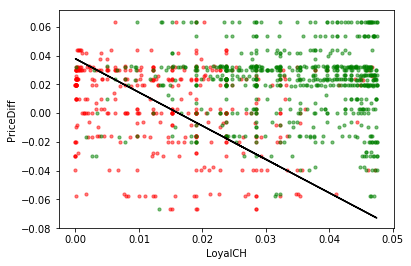

In [24]:
lsvc = LinearSVC()
lsvc.fit(X,y)
coef0 = lsvc.intercept_
#La ecuación del hiperplano se puede escribir de la forma
#coef0 + coef1*x1 + coef2*x2 = 0
coef1 = lsvc.coef_[0][0]
coef2 = lsvc.coef_[0][1]

plt.figure()
#Despejando la ecuación del comentario anterior se obtienen la pendiente
#y el intercepto
plt.plot(X[:,0], line(-coef1/coef2, -coef0/coef2), color="black", )
plt.scatter(X1_1, X2_1, color="red", alpha = 0.5, s = 10)
plt.scatter(X1_0, X2_0, color="green", alpha = 0.5, s = 10)
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')

Utilice el dataset Cars93.csv para crear una variable binaria para los carros que tienen MPG.city mayor/menor que la media. Utilizando Fuel.tank.capacity, Horsepower, Length, Rev.per.mile, Turn.circle, Weight como predictores encuentre (con y sin sklearn) el mejor hiperplano que separa los carros en MPG.city mayor/menor que la media.

In [38]:
#Sin sklearn tocaría plotear un scatter en R^6... para ver mas o menos entre
#que valores variar los coeficientes, y eso está como difícil. Si a alguno se 
#le ocurre una manera de implementar esto por favor ilústrenos.

df = pd.read_csv('Cars93.csv')
X = df[['Fuel.tank.capacity', 'Horsepower', 'Length', 'Rev.per.mile', 'Turn.circle', 'Weight']].values
X = normalize(X, axis = 0)
y = df['MPG.city'].values

#Vuelvo 'y' la variable categórica deseada.
media_y = np.mean(y)
for i in range(len(y)):
    if(y[i] < media_y):
        y[i] = 0
    else:
        y[i] = 1
        
#Se encuentra el mejor hiperplano usando sklearn.
lsvc = LinearSVC()
lsvc.fit(X,y)
coef0 = lsvc.intercept_
#La ecuación del hiperplano se puede escribir de la forma
#coef0 + coef1*x1 + coef2*x2 + ... + coef6*x6 = 0
coefs = lsvc.coef_[0]